In [1]:
#! pip install numpy pandas xlrd matplotlib seaborn scipy statsmodels scikit-learn imbalanced-learn ppscore tensorflow minisom lime shap geopy folium

In [2]:
cityname = "Raipur"
dataset_path = f'{cityname}.csv'
method = 'k-means-clustering'

In [3]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

In [4]:
df = pd.read_csv(dataset_path)
df = df.reset_index().rename(columns = {
    "index": "id"
})
df.drop(columns=["ID"], inplace=True)

ptype = []

for i in df['Population']:
    if(0 <= i <= 15000):
        ptype.append("Low")
    elif(15001 <= i <= 30000):
        ptype.append("Mid")
    else:
        ptype.append("High")

df["Population Density"] = ptype
df.head()

,id,Pin Code,Name,Latitude,Longitude,Population,Area (km),Population Density
0,0,492004,Shankar Nagar,21.249373,81.665430,19893,3.56,Mid
1,1,492007,Mowa,21.274871,81.634055,26767,7.93,Mid
2,2,492001,Mahaveer Nagar,21.226893,81.663033,15246,3.97,Mid
3,3,492007,New Shanti Nagar,21.246982,81.647489,5129,0.31,Low
4,4,492101,Nardaha,21.293952,81.739268,6575,14.15,Low


<AxesSubplot:xlabel='Population', ylabel='Count'>

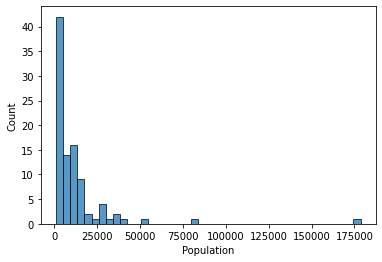

In [5]:
sns.histplot(df, x = "Population")

In [6]:
# Get coordinates to start the map
location = get_geocoder(address = cityname)
print("[lat, long]:", location)

Raipur, Raipur Tahsil, Raipur, Chhattisgarh, 493332, India
[lat, long]: [21.2379469, 81.6336833]


In [7]:

map_ = plot_map(df, x = "Latitude", y = "Longitude", start = location, zoom = 11, 
                tiles = "cartodbpositron", popup = "Name", 
                size = "Area (km)", color = "Population Density", lst_colors = ["red","green","orange"], legend = True,
                marker = None)

map_.save(f'final-output/{cityname}-population-{method}.html')
map_

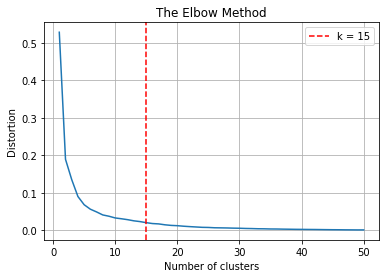

best k =  15


In [8]:
# K-means (euclidean geom, even clusters, must specify k)
k_best = find_best_k(df[["Latitude","Longitude"]], max_k = 50)
print("best k = ", k_best)
k = 25 # According to us

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, init = 'k-means++', random_state = 1729)

In [10]:
model.fit(df[["Latitude","Longitude"]])
model

KMeans(n_clusters=25, random_state=1729)

In [11]:
coord_clusters = model.cluster_centers_
coord_clusters

array([[21.25457691, 81.64243487],
       [21.2007261 , 81.78895847],
       [21.2539578 , 81.56593215],
       [21.1327578 , 81.73928025],
       [21.3079113 , 81.74020455],
       [21.20890778, 81.62810328],
       [21.13957284, 81.78438382],
       [21.20694725, 81.6645639 ],
       [21.30980885, 81.5995573 ],
       [21.2651693 , 81.66901625],
       [21.23397977, 81.63491089],
       [21.314799  , 81.787518  ],
       [21.23638455, 81.61437323],
       [21.17289483, 81.77032667],
       [21.2835212 , 81.6024518 ],
       [21.26258567, 81.59124127],
       [21.2115801 , 81.69741755],
       [21.1580233 , 81.6559087 ],
       [21.30363975, 81.65050875],
       [21.2005224 , 81.7402792 ],
       [21.2700471 , 81.62316413],
       [21.23771033, 81.66563274],
       [21.16449855, 81.79311565],
       [21.22140744, 81.64910768],
       [21.2348173 , 81.5891374 ]])

In [12]:
cluster_vals = model.predict(df[["Latitude","Longitude"]])
cluster_vals

array([21, 20, 21,  0,  4,  9, 23,  9, 23, 10, 14,  8, 21, 10, 20,  9, 11,
       10, 10, 12,  0,  2, 20, 24, 21, 19,  7, 17,  2,  0, 15,  5, 15, 12,
       12,  7, 24,  9, 16,  0, 10,  7, 15,  5, 15, 10, 20, 23,  4, 18, 21,
       23,  9, 12, 10, 21,  0, 21,  5,  0, 12,  0,  0, 24,  9,  7,  5, 15,
       15,  0,  8, 10,  9, 16, 10, 18, 12,  9, 10, 23,  1,  3,  1,  1, 13,
       13, 13, 22, 22,  6,  6,  6,  6,  6,  3], dtype=int32)

In [13]:
from haversine import haversine, Unit
cluster_lat, cluster_long = [], []
dist = []
idx = 0

point_lat = df['Latitude'].to_numpy()
point_long = df['Longitude'].to_numpy()

# print(point_lat)
# print(point_long)

for cluster_val in cluster_vals:
    (x, y) = coord_clusters[cluster_val]
    cluster_lat.append(x)
    cluster_long.append(y)
    dist.append(haversine((x, y), (point_lat[idx], point_long[idx])))
    idx += 1

In [14]:
df['Cluster Latitude'] = cluster_lat
df['Cluster Longitude'] = cluster_long
df['Cluster'] = cluster_vals
df['Cluster Distance'] = dist

In [15]:
df.head()

,id,Pin Code,Name,Latitude,Longitude,Population,Area (km),Population Density,Cluster Latitude,Cluster Longitude,Cluster,Cluster Distance
0,0,492004,Shankar Nagar,21.249373,81.665430,19893,3.56,Mid,21.237710,81.665633,21,1.297003
1,1,492007,Mowa,21.274871,81.634055,26767,7.93,Mid,21.270047,81.623164,20,1.249474
2,2,492001,Mahaveer Nagar,21.226893,81.663033,15246,3.97,Mid,21.237710,81.665633,21,1.232622
3,3,492007,New Shanti Nagar,21.246982,81.647489,5129,0.31,Low,21.254577,81.642435,0,0.993747
4,4,492101,Nardaha,21.293952,81.739268,6575,14.15,Low,21.307911,81.740205,4,1.555236


In [16]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    '#ffff00',
    '#00ff11',
    '#0022ff',
    '#d400ff',
    '#ff00b3',
    '#00ffbf',
    '#ff9100',
    '#ffd500',
    '#b3ff00',
    '#ff6a00',
    '#ff5100',
    '#5500ff',
    '#9d00ff',
    '#d000ff'
    'black'
]

In [17]:
cdf = df.groupby('Cluster', as_index=False).agg({'Population':'sum', 'Cluster Distance':'sum', 'Area (km)': 'sum'})
cdf[['Latitude', 'Longitude']] = coord_clusters
cdf['Station Name'] = [f"{i + 1}" for i in range(k)]

In [18]:
cdf

,Cluster,Population,Cluster Distance,Area (km),Latitude,Longitude,Station Name
0,0,93312,6.761400,16.09,21.254577,81.642435,1
1,1,5522,4.500982,16.38,21.200726,81.788958,2
2,2,53553,2.415139,15.24,21.253958,81.565932,3
3,3,14504,3.281430,40.54,21.132758,81.739280,4
4,4,10785,3.110471,17.98,21.307911,81.740205,5
5,5,58461,2.063941,11.95,21.208908,81.628103,6
6,6,34821,3.543922,3.18,21.139573,81.784384,7
7,7,22206,4.678178,12.75,21.206947,81.664564,8
8,8,261987,2.919783,58.35,21.309809,81.599557,9
9,9,40764,9.269830,15.35,21.265169,81.669016,10


In [19]:
idx = 0
for (x, y) in model.cluster_centers_:
    # With-in-Sum-of-Squares (WSS): WSS is the total distance of data points from their respective cluster centroids.
    html=f"""
        <link href='http://fonts.googleapis.com/css?family=Roboto' rel='stylesheet' type='text/css'>
        <div style = "font-family: 'Roboto', sans-serif;">
            <h4> Cluster {idx + 1}</h4>
            <p>Details: </p>
            <ul>
                <li>Population: {cdf.iloc[idx, 1]}</li>
                <li>WSS: {cdf.iloc[idx, 2]:.3f} km</li>
                <li>Area: {cdf.iloc[idx, 3]:.3f} km^2</li>
            </ul>
            </p>
        <div>
        """
    iframe = folium.IFrame(html=html, width = 200, height = 200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location = [x, y],
        popup = popup,
        icon = folium.Icon(
            color = colors[idx]
        )
    ).add_to(map_)
    idx += 1

map_.save(f'final-output/{cityname}-clusters-population-{method}.html')
map_

In [20]:
from mst_utils import *
mst_map = gen_mst(cityname, cdf)
mst_map.save(f'final-output/{cityname}-final-mst-without-checkmark-{method}.html')
mst_map

total length of metro line = 83.35445416505644 km


In [21]:
idx = 0
for (x, y) in model.cluster_centers_:
    # With-in-Sum-of-Squares (WSS): WSS is the total distance of data points from their respective cluster centroids.
    html=f"""
        <link href='http://fonts.googleapis.com/css?family=Roboto' rel='stylesheet' type='text/css'>
        <div style = "font-family: 'Roboto', sans-serif;">
            <h4> Station {idx + 1}</h4>
            <p>Details: </p>
            <ul>
                <li>Population: {cdf.iloc[idx, 1]}</li>
                <li>WSS: {cdf.iloc[idx, 2]:.3f} km</li>
                <li>Area: {cdf.iloc[idx, 3]:.3f} km^2</li>
            </ul>
        <div>
        """
    iframe = folium.IFrame(html=html, width = 200, height = 200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location = [x, y],
        popup = popup,
        icon = folium.Icon(
            color = colors[idx]
        )
    ).add_to(mst_map)
    idx += 1

In [22]:
mst_map

In [23]:
mst_map.save(f'final-output/{cityname}-final-mst-{method}.html')

In [24]:
cdf.to_csv(f'final-output/{cityname}-final-mst-{method}.csv')